### BankCustomerChurn Prediction

#### Importing packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# dropping 'RowNumber' column as it serves no purpose here
df = df.drop(['RowNumber'], axis =1)

In [5]:
#Checking for null values
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df.tail(8)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9992,15657105,Chukwualuka,726,Spain,Male,36,2,0.00,1,1,0,195192.40,0
9993,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [7]:
# Checking for dtypes of the attributes in the dataset
df.dtypes

CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [8]:
# Displaying the categorical variables along with their categories
for cols in df.columns:
    if len(df[cols].unique()) <=20:
        print(cols)
        print(df[cols].unique())
        #print('\n')

Geography
['France' 'Spain' 'Germany']
Gender
['Female' 'Male']
Tenure
[ 2  1  8  7  4  6  3 10  5  9  0]
NumOfProducts
[1 3 2 4]
HasCrCard
[1 0]
IsActiveMember
[1 0]
Exited
[1 0]


In [9]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

### Exploratory Data Analysis

In [10]:
# Display the column names in the dataset
for cols in df.columns:
    print(cols)

CustomerId
Surname
CreditScore
Geography
Gender
Age
Tenure
Balance
NumOfProducts
HasCrCard
IsActiveMember
EstimatedSalary
Exited


In [11]:
# Undersntading the balance of the dataset by exploring churn vs non-churn customers
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

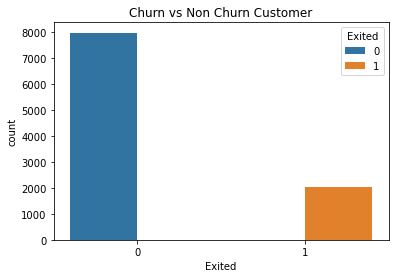

In [12]:
plt.title('Churn vs Non Churn Customer')
sns.countplot(df['Exited'], hue=df['Exited'])

In [13]:
print('Percentage of people who churn is {}%'.format(len(df[df['Exited']==1])/ len(df)*100))
print('Percentage of people who did not churn is {}%'.format(len(df[df['Exited']==0])/ len(df)*100))

Percentage of people who churn is 20.369999999999997%
Percentage of people who did not churn is 79.63%


#### From the above chart; we can clearly understand that the dataset is clearly imbalanced which only has 20% of people who exited the bank; wherein around 80% of the people did'nt leave the bank.

Text(0.5, 1.0, 'Distribution of Credit Score amoung cutomers in the dataset')

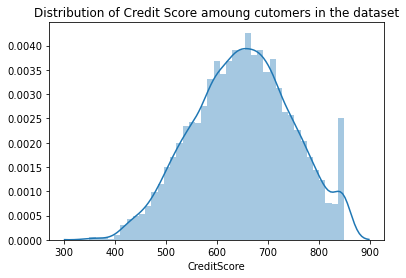

In [14]:
## Exploring Credit Score Attribute as it is an important feature
### Checking the distribution of credit score in the dataset
sns.distplot(df['CreditScore'])
plt.title('Distribution of Credit Score amoung cutomers in the dataset')

In [15]:
credit_score_400 = df[df['CreditScore']<400]

In [16]:
credit_score_400

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
942,15804586,Lin,376,France,Female,46,6,0.00,1,1,0,157333.69,1
1193,15779947,Thomas,363,Spain,Female,28,6,146098.43,3,1,0,100615.14,1
1201,15651052,McMasters,399,Germany,Male,46,2,127655.22,1,1,0,139994.68,1
1405,15612494,Panicucci,359,France,Female,44,6,128747.69,1,1,0,146955.71,1
1631,15685372,Azubuike,350,Spain,Male,54,1,152677.48,1,1,1,191973.49,1
1838,15758813,Campbell,350,Germany,Male,39,0,109733.20,2,0,0,123602.11,1
1962,15692416,Aikenhead,358,Spain,Female,52,8,143542.36,3,1,0,141959.11,1
2473,15679249,Chou,351,Germany,Female,57,4,163146.46,1,1,0,169621.69,1
2579,15597896,Ozoemena,365,Germany,Male,30,0,127760.07,1,1,0,81537.85,1


In [17]:
credit_score_400['Exited'].value_counts()

1    19
Name: Exited, dtype: int64

### As it clearly states that people with credit score less than 400; all of the 19 people churned. It clearly suggests that Credit Score is an important attribute to check for.

In [18]:
df['CreditScore_bins'] = pd.cut(df['CreditScore'], bins =8)
df['CreditScore_qbins'] = pd.qcut(df['CreditScore'], q =8)

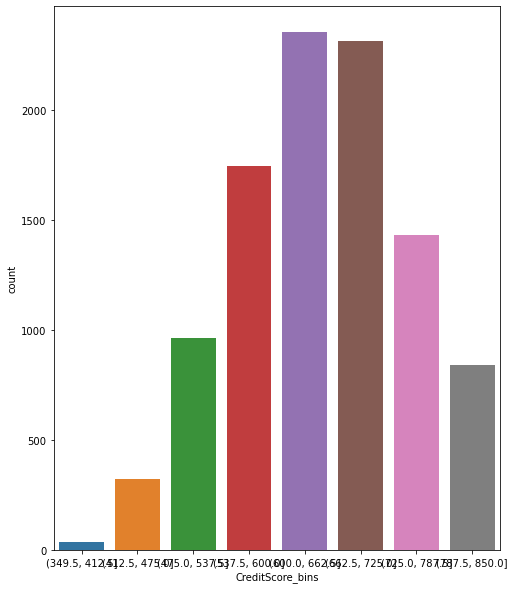

In [19]:
plt.figure(figsize=(8,10))
sns.countplot(df['CreditScore_bins'])

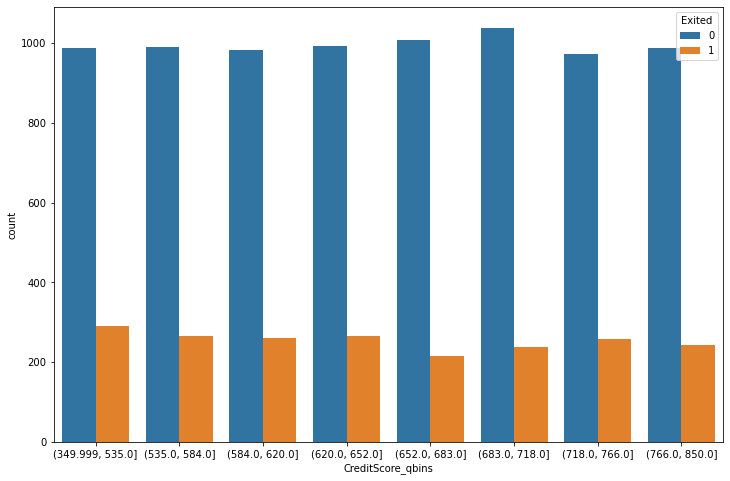

In [20]:
plt.figure(figsize=(12,8))
sns.countplot(df['CreditScore_qbins'], hue = df['Exited'])

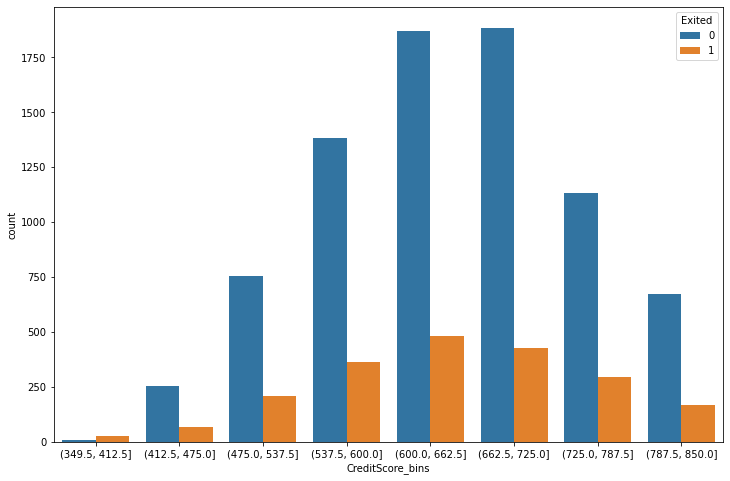

In [21]:
plt.figure(figsize=(12,8))
sns.countplot(df['CreditScore_bins'], hue = df['Exited'])

In [22]:
### From the countplot; we can say that most of the customer churn have credit scores ranging from (535-725)

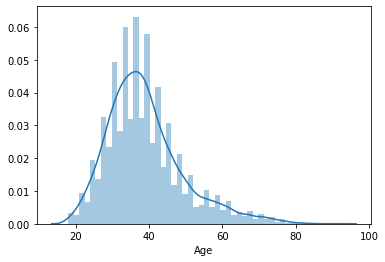

In [23]:
# Checking the distribution of Age
sns.distplot(df['Age'])

In [24]:
df['Age_bins'] = pd.cut(df['Age'], bins = 8)

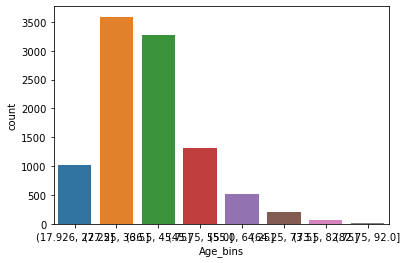

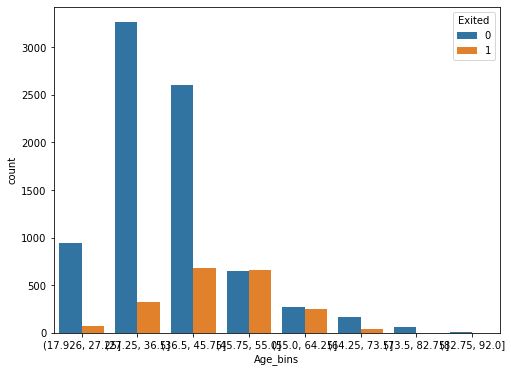

In [25]:
sns.countplot(df['Age_bins'])
plt.show()
plt.figure(figsize=(8,6))
sns.countplot(df['Age_bins'], hue=df['Exited'])

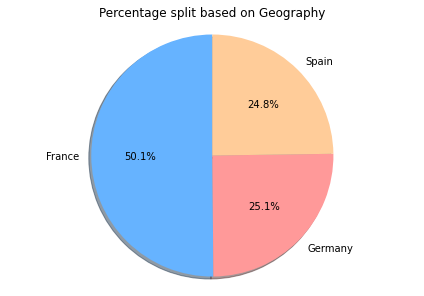

In [26]:
# Checking with geography feature
#Geosplit = train.Geography.value_counts()
Geovalues  = df['Geography'].value_counts().values.tolist()
Geolabels  = df['Geography'].value_counts().keys().tolist()
colors = ['#66b3ff', '#ff9999' , '#ffcc99']
fig2, f2 = plt.subplots()
f2.pie(Geovalues,labels=Geolabels, colors = colors, autopct='%1.1f%%',shadow=True, startangle=90) 
# Equal aspect ratio ensures that pie is drawn as a circle
f2.axis('equal')
plt.tight_layout()
plt.title('Percentage split based on Geography')
plt.show()

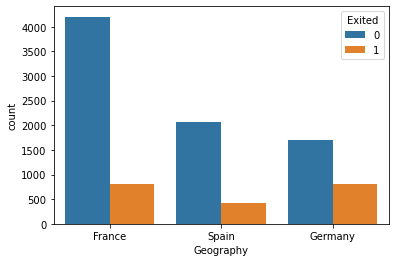

In [27]:
# Checking churn customers with respect to region
sns.countplot(df['Geography'], hue = df['Exited'])

In [28]:
df.groupby(['Geography', 'Exited'])['Exited'].count()

Geography  Exited
France     0         4204
           1          810
Germany    0         1695
           1          814
Spain      0         2064
           1          413
Name: Exited, dtype: int64

In [29]:
# Least people churned from Spain and highest from Germany

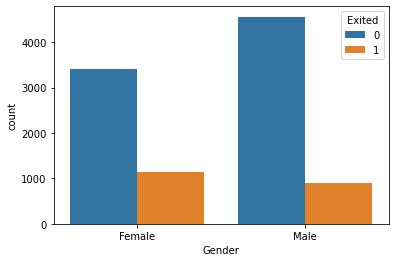

In [30]:
sns.countplot(df['Gender'], hue=df['Exited'])

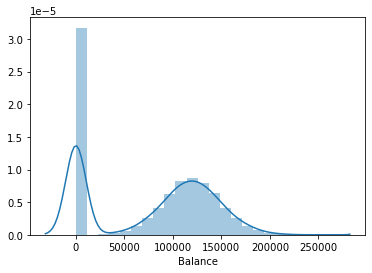

In [31]:
sns.distplot(df['Balance'])

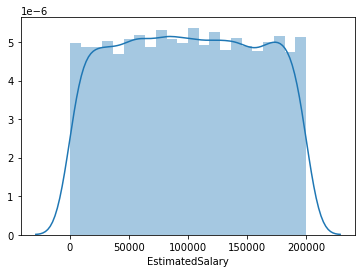

In [32]:
sns.distplot(df['EstimatedSalary'])

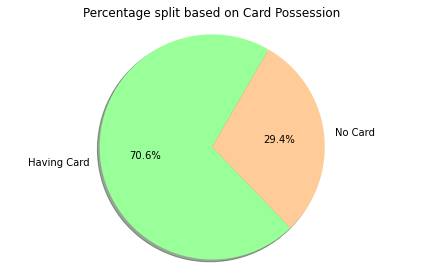

In [33]:
HasCardvalues  = df['HasCrCard'].value_counts().values.tolist()
HasCardlabels  = ["Having Card" , "No Card"]
colors = ['#99ff99','#ffcc99']
fig5, f5 = plt.subplots()
f5.pie(HasCardvalues ,labels=HasCardlabels, colors = colors,autopct='%1.1f%%',shadow=True, startangle=60) 
f5.axis('equal')
plt.title('Percentage split based on Card Possession')
plt.tight_layout()
plt.show()

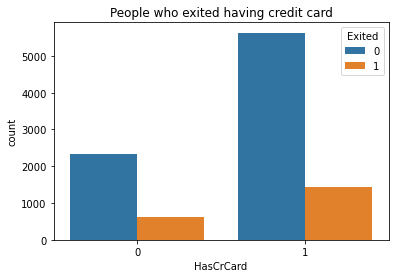

In [34]:
plt.title('People who exited having credit card')
sns.countplot(df['HasCrCard'], hue=df['Exited'])

In [35]:
df.groupby(['HasCrCard', 'Exited'])['HasCrCard'].count()

HasCrCard  Exited
0          0         2332
           1          613
1          0         5631
           1         1424
Name: HasCrCard, dtype: int64

#### People having credit card churned and which creditcard holders should be priortized as they are the most probable one's to churn

In [36]:
df['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

In [37]:
df[df['Exited']==1].groupby(['IsActiveMember', 'HasCrCard','Exited'])['Exited'].count()

IsActiveMember  HasCrCard  Exited
0               0          1         360
                1          1         942
1               0          1         253
                1          1         482
Name: Exited, dtype: int64

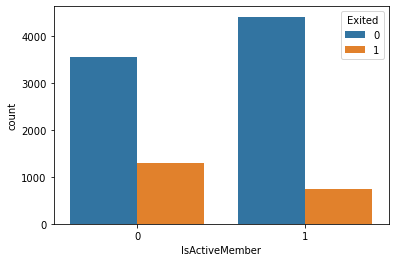

In [38]:
sns.countplot(df['IsActiveMember'], hue=df['Exited'])

In [39]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScore_bins,CreditScore_qbins,Age_bins
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,"(600.0, 662.5]","(584.0, 620.0]","(36.5, 45.75]"
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,"(600.0, 662.5]","(584.0, 620.0]","(36.5, 45.75]"
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,"(475.0, 537.5]","(349.999, 535.0]","(36.5, 45.75]"
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,"(662.5, 725.0]","(683.0, 718.0]","(36.5, 45.75]"
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,"(787.5, 850.0]","(766.0, 850.0]","(36.5, 45.75]"


In [40]:
# Checking for outliers in the continous value columns

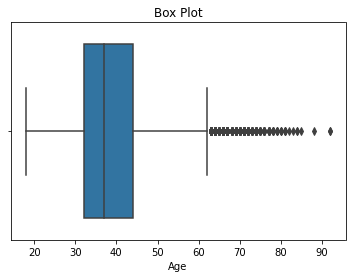

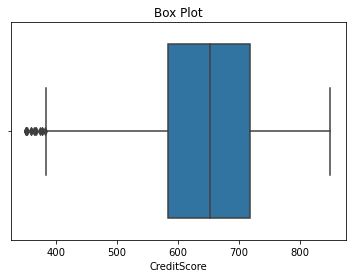

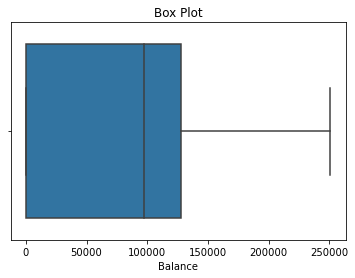

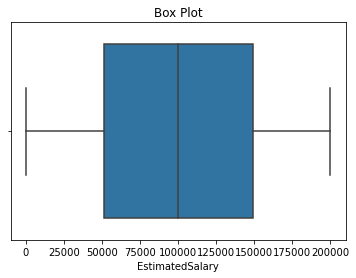

In [41]:
column = ["Age", 'CreditScore', "Balance", "EstimatedSalary"]
for i in column:
    #plt.figure(figsize = (8,8))
    sns.boxplot(df[i])
    plt.title('Box Plot')
    plt.show()

In [42]:
#Observing the boxplot we can clearly state that there are clear outliers in Age and CreditScore column
# Age>60 are outliers in Age columns and CreditScore<400 is an outlier
df = df[df['Age']<60]
df = df[df['CreditScore']>400]

In [43]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'CreditScore_bins', 'CreditScore_qbins',
       'Age_bins'],
      dtype='object')

In [44]:
# Dropping columns
df = df.drop(['CustomerId', 'Surname', 'CreditScore_bins', 'CreditScore_qbins', 'Age_bins'], axis =1)

In [45]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


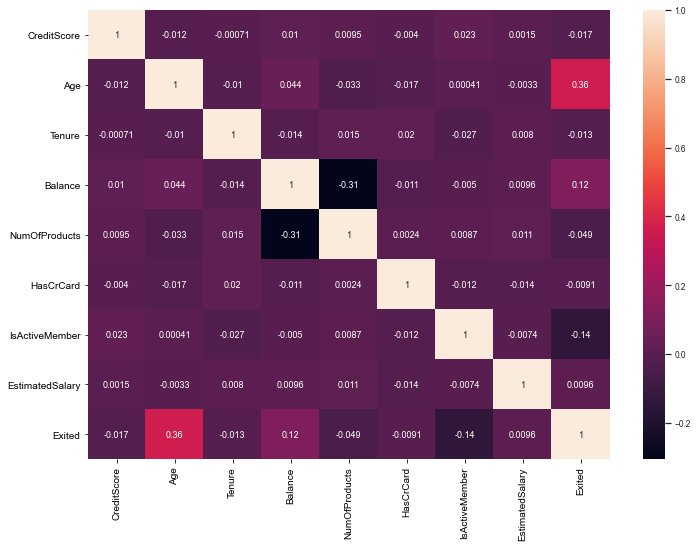

In [46]:
# Displaying the Correaltion Matrix
corr = df.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.set(font_scale = 0.75)
sns.heatmap(corr, annot = True)

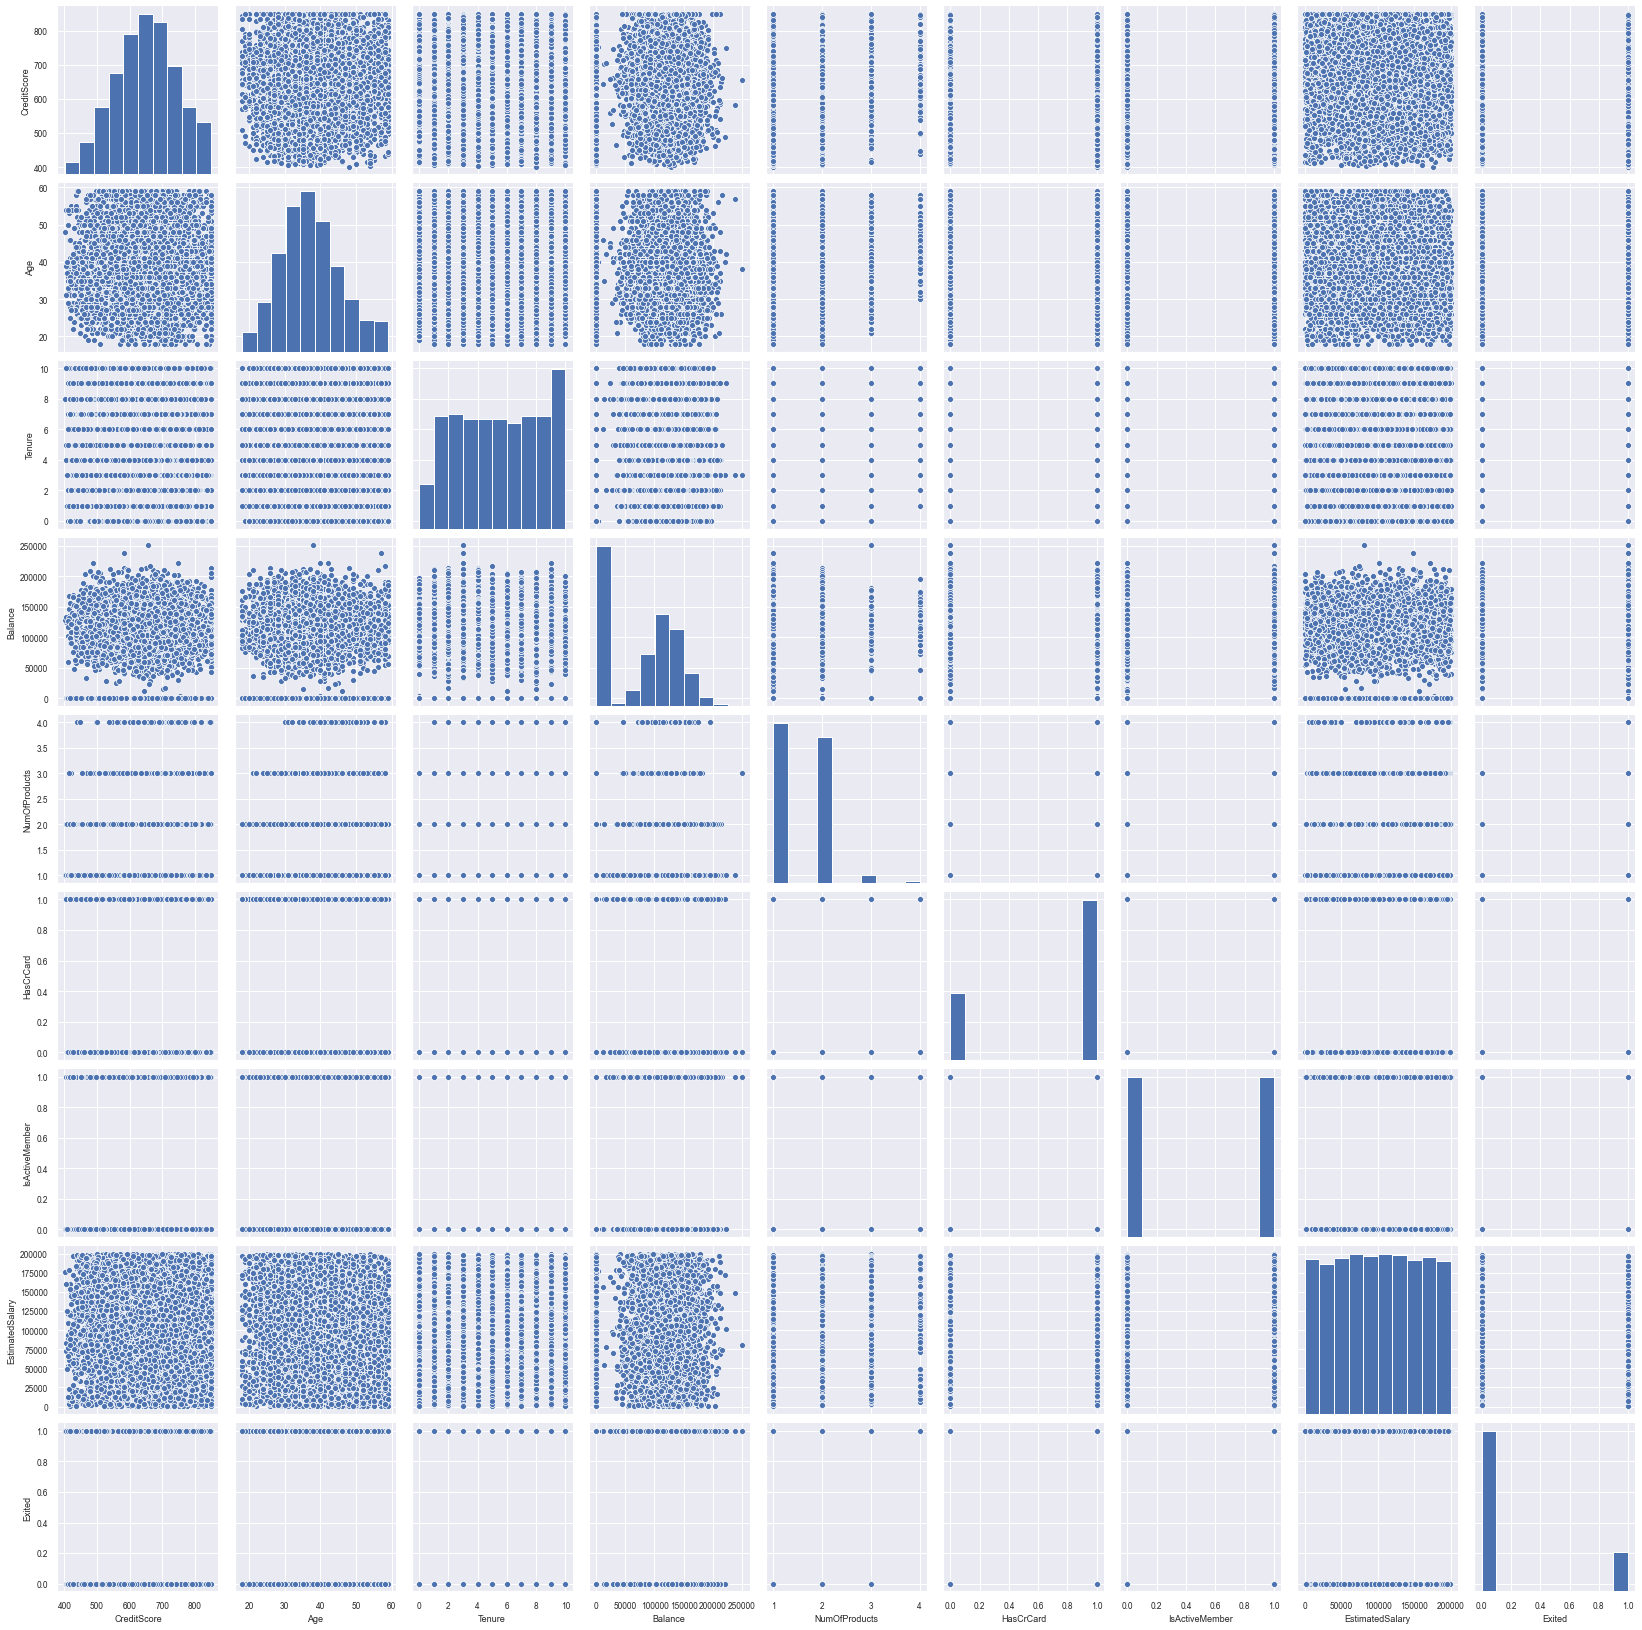

In [47]:
sns.pairplot(df)
plt.show()

### Observing the distributions of continous variables in the dataframe

Distribution plot of CreditScore


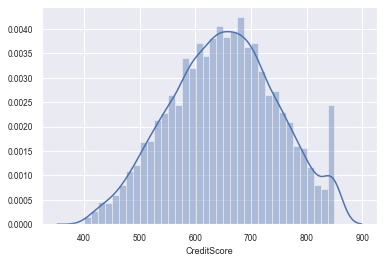

Distribution plot of Age


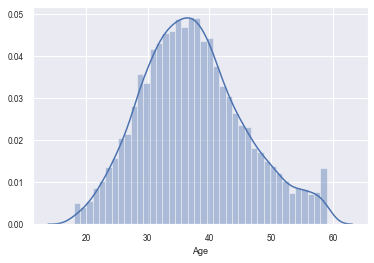

Distribution plot of Balance


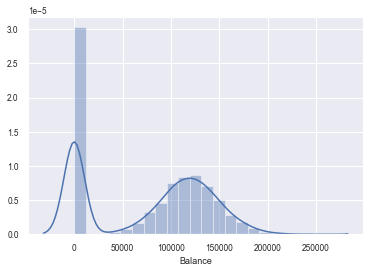

Distribution plot of EstimatedSalary


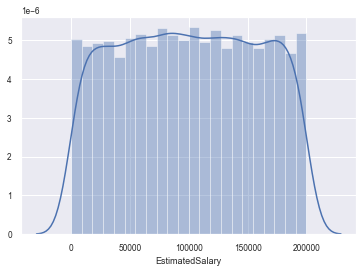

In [48]:
for cols in df.columns:
    if (df[cols].dtype != 'object') & (len(df[cols].unique())>=20) & (cols!='CustomerId'):
        
        print("Distribution plot of",cols)
        sns.distplot(df[cols])
        plt.show()

In [49]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9456.000000,9456.000000,9456.000000,9456.000000,9456.000000,9456.000000,9456.000000,9456.000000,9456.00000
mean,650.898266,37.373308,5.018084,76521.194565,1.531514,0.704949,0.500212,100176.595754,0.19797
std,95.810805,8.316748,2.887855,62444.638692,0.579448,0.456090,0.500026,57503.154035,0.39849
min,401.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.00000
25%,584.000000,31.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51228.457500,0.00000
50%,652.000000,37.000000,5.000000,97302.205000,1.000000,1.000000,1.000000,100350.530000,0.00000
75%,717.000000,42.000000,8.000000,127644.240000,2.000000,1.000000,1.000000,149406.545000,0.00000
max,850.000000,59.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.00000


In [50]:
### Scaling or Normalizing the data
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.model_selection import train_test_split

In [51]:
df = pd.get_dummies(df, drop_first=True)

In [52]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [53]:
df["Balance"] = StandardScaler().fit_transform(df["Balance"].values.reshape(-1,1))
df["CreditScore"] = StandardScaler().fit_transform(df["CreditScore"].values.reshape(-1,1))
df["EstimatedSalary"] = StandardScaler().fit_transform(df["CreditScore"].values.reshape(-1,1))

In [54]:
df["Age"] = StandardScaler().fit_transform(df["Age"].values.reshape(-1,1))

In [55]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
count,9.456000e+03,9.456000e+03,9456.000000,9.456000e+03,9456.000000,9456.000000,9456.000000,9.456000e+03,9456.00000,9456.000000,9456.000000,9456.000000
mean,4.804392e-17,-1.287276e-16,5.018084,-3.063211e-16,1.531514,0.704949,0.500212,2.700416e-17,0.19797,0.251692,0.247568,0.546108
std,1.000053e+00,1.000053e+00,2.887855,1.000053e+00,0.579448,0.456090,0.500026,1.000053e+00,0.39849,0.434008,0.431622,0.497896
min,-2.608385e+00,-2.329556e+00,0.000000,-1.225489e+00,1.000000,0.000000,0.000000,-2.608385e+00,0.00000,0.000000,0.000000,0.000000
25%,-6.982699e-01,-7.663627e-01,3.000000,-1.225489e+00,1.000000,0.000000,0.000000,-6.982699e-01,0.00000,0.000000,0.000000,0.000000
50%,1.149967e-02,-4.488866e-02,5.000000,3.328085e-01,1.000000,1.000000,1.000000,1.149967e-02,0.00000,0.000000,0.000000,1.000000
75%,6.899559e-01,5.563397e-01,8.000000,8.187372e-01,2.000000,1.000000,1.000000,6.899559e-01,0.00000,1.000000,0.000000,1.000000
max,2.078182e+00,2.600516e+00,10.000000,2.792652e+00,4.000000,1.000000,1.000000,2.078182e+00,1.00000,1.000000,1.000000,1.000000


In [56]:
## SPlitting data
X = df.drop(['Exited'], axis=1)
y = df['Exited']

In [57]:
type(y)

pandas.core.series.Series

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state=42)

In [59]:
print('Shape of X_train', X_train.shape)
print('Shape of y_train', y_train.shape)

Shape of X_train (7564, 11)
Shape of y_train (7564,)


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score

In [61]:
model_accuracy = {'models':[],
                 'accuracy':[],
                 'auc': [],
                 'sensitivity': []}

### Logistic Regression

In [62]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_preds = lr.predict(X_test)
lr_acc = accuracy_score(lr_preds, y_test)
print('Accuracy using Logistic Regression is', round(lr_acc*100,2))
cm = confusion_matrix(y_test,lr_preds)
print('Confusion Matrix is')
print(cm)
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (fn+tp)
print('Sensitivity attained using Logistic Regression is:',round(sensitivity,2))
fpr, tpr, thresholds = metrics.roc_curve(y_test, lr_preds)
roc_auc = metrics.auc(fpr, tpr)
print('AUC using Logistic Regression is:', round(roc_auc,2))
model_accuracy['models'].append('LogisticRegression')
model_accuracy['accuracy'].append(round(lr_acc*100,2))
model_accuracy['auc'].append(roc_auc)
model_accuracy['sensitivity'].append(sensitivity)



Accuracy using Logistic Regression is 82.56
Confusion Matrix is
[[1442   54]
 [ 276  120]]
Sensitivity attained using Logistic Regression is: 0.3
AUC using Logistic Regression is: 0.63


In [63]:
## Using GridSearchCV to find better parameters
grid_values = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}
model_lr = GridSearchCV(lr, param_grid=grid_values)
model_lr.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",model_lr.best_params_)

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/admin/opt/anac

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2'}


/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


In [64]:
model_lr.best_estimator_

LogisticRegression(C=0.1)

In [65]:
best_parameter = model_lr.best_estimator_
print(best_parameter)
best_pred = best_parameter.predict(X_test)
best_acc = accuracy_score(y_test, best_pred)
print('Accuracy using GridSearchCV Logistic Regression is', round(best_acc*100,2))
cm = confusion_matrix(y_test,best_pred)
print('Confusion Matrix is')
print(cm)
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (fn+tp)
print('Sensitivity attained using GridSearchCV Logistic Regression is:',round(sensitivity,2))
fpr, tpr, thresholds = metrics.roc_curve(y_test, best_pred)
roc_auc = metrics.auc(fpr, tpr)
print('AUC using GridSearchCV Logistic Regression is:', round(roc_auc,2))
model_accuracy['models'].append('LR_GridSearch')
model_accuracy['accuracy'].append(round(best_acc*100,2))
model_accuracy['auc'].append(roc_auc)
model_accuracy['sensitivity'].append(sensitivity)

LogisticRegression(C=0.1)
Accuracy using GridSearchCV Logistic Regression is 82.45
Confusion Matrix is
[[1445   51]
 [ 281  115]]
Sensitivity attained using GridSearchCV Logistic Regression is: 0.29
AUC using GridSearchCV Logistic Regression is: 0.63


### Selecting important Features

In [66]:
from sklearn.feature_selection import SelectFromModel

In [67]:
feature = SelectFromModel(LogisticRegression())
feature.fit(X_train,y_train)
feature_support = feature.get_support()
feature_selected = X_train.loc[:,feature_support].columns.tolist()
print(str(len(feature_selected)), 'selected features')

4 selected features


### Features Selected from Logsitic Regression Model are

In [68]:
feature_selected

['Age', 'IsActiveMember', 'Geography_Germany', 'Gender_Male']

In [69]:
## Training the model with best parameter value and the best features
X_new_features = X_train[feature_selected]
y_new = y_train
lr1 = LogisticRegression(C=0.1, penalty = 'l2')
lr1.fit(X_new_features,y_new)
lr1_preds = lr1.predict(X_test[feature_selected])
lr1_acc = accuracy_score(lr1_preds, y_test)


print('Accuracy using best features with Logistic Regression is', round(lr1_acc*100,2))
cm = confusion_matrix(y_test,lr1_preds)
print('Confusion Matrix is')
print(cm)
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (fn+tp)
print('Sensitivity attained using best features with Logistic Regression is:',round(sensitivity,2))
fpr, tpr, thresholds = metrics.roc_curve(y_test, lr1_preds)
roc_auc = metrics.auc(fpr, tpr)
print('AUC using best features using Logistic Regression is:', round(roc_auc,2))
model_accuracy['models'].append('LR_bestFeatures')
model_accuracy['accuracy'].append(round(lr1_acc*100,2))
model_accuracy['auc'].append(lr1_acc)
model_accuracy['sensitivity'].append(sensitivity)

Accuracy using best features with Logistic Regression is 82.4
Confusion Matrix is
[[1446   50]
 [ 283  113]]
Sensitivity attained using best features with Logistic Regression is: 0.29
AUC using best features using Logistic Regression is: 0.63


### Random Forest Model

In [70]:
from sklearn.ensemble import RandomForestClassifier
import scikitplot as skplot

In [71]:
rfc = RandomForestClassifier(criterion='gini')
rfc.fit(X_train,y_train)
rfc_predict = rfc.predict(X_test)
rfc_acc = accuracy_score(rfc_predict,y_test)

print('Accuracy using Random Forest Model', round(rfc_acc*100,2))
cm = confusion_matrix(y_test,rfc_predict)
print('Confusion Matrix is')
print(cm)
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (fn+tp)
print('Sensitivity using Random Forest is:',round(sensitivity,2))
fpr, tpr, thresholds = metrics.roc_curve(y_test, rfc_predict)
roc_auc = metrics.auc(fpr, tpr)
print('AUC using Random Forest is:', round(roc_auc,2))
model_accuracy['models'].append('RandomForest')
model_accuracy['accuracy'].append(round(rfc_acc*100,2))
model_accuracy['auc'].append(roc_auc)
model_accuracy['sensitivity'].append(sensitivity)


Accuracy using Random Forest Model 85.52
Confusion Matrix is
[[1442   54]
 [ 220  176]]
Sensitivity using Random Forest is: 0.44
AUC using Random Forest is: 0.7


In [72]:
cm = confusion_matrix(y_test, rfc_predict)
print(cm)

[[1442   54]
 [ 220  176]]


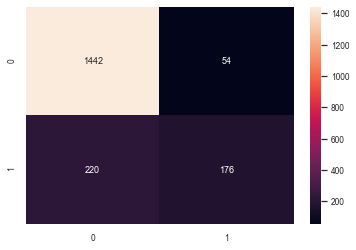

In [73]:
sns.heatmap(cm,annot=True, fmt='d')
plt.show()

In [74]:
from sklearn.metrics import roc_curve

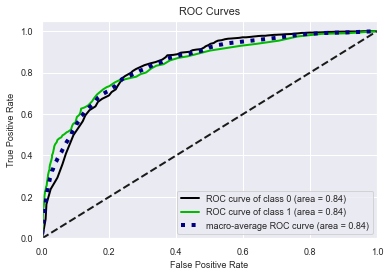

In [75]:
skplot.metrics.plot_roc(y_test, rfc.predict_proba(X_test), plot_micro=False)

In [76]:
# Using Grid Search CV

random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
'max_features': ['auto','sqrt'],
'max_depth': [int(x) for x in np.linspace(10,110,num=11)],
'min_samples_split': [2,5,10],
'min_samples_leaf': [1,2,4],
'bootstrap': [True, False]
}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [77]:
random = RandomForestClassifier()

In [78]:
from sklearn.model_selection import RandomizedSearchCV
random_para = RandomizedSearchCV(estimator = random, param_distributions=random_grid,  n_iter= 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
random_para.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.3min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [79]:
random_para.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 70,
 'bootstrap': True}

In [80]:
random_para.best_score_

0.8610521736367723

In [81]:
best_estimator = random_para.best_estimator_
best_pred = best_estimator.predict(X_test)
best_acc = accuracy_score(y_test, best_pred)

print('Accuracy using RandomSearchCV with Random Forest is', round(best_acc*100,2))
cm = confusion_matrix(y_test,best_pred)
print('Confusion Matrix is')
print(cm)
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (fn+tp)
print('Sensitivity attained using RandomSearchCV with Random Forest is:',round(sensitivity,2))
fpr, tpr, thresholds = metrics.roc_curve(y_test, best_pred)
roc_auc = metrics.auc(fpr, tpr)
print('AUC using RandomSearchCV using Random Forest is:', round(roc_auc,2))
model_accuracy['models'].append('RF_RandomSearch')
model_accuracy['accuracy'].append(round(best_acc*100,2))
model_accuracy['auc'].append(roc_auc)
model_accuracy['sensitivity'].append(sensitivity)



Accuracy using RandomSearchCV with Random Forest is 85.36
Confusion Matrix is
[[1441   55]
 [ 222  174]]
Sensitivity attained using RandomSearchCV with Random Forest is: 0.44
AUC using RandomSearchCV using Random Forest is: 0.7


### ROC Curve for BestEstimator from RandomSearch Random Forest Model

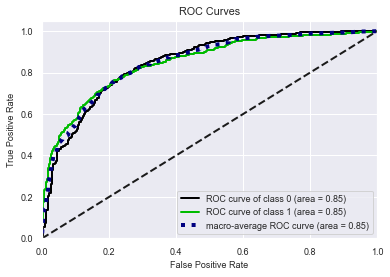

In [82]:
skplot.metrics.plot_roc(y_test, best_estimator.predict_proba(X_test), plot_micro=False)

In [83]:
best_estimator.feature_importances_

array([0.10007454, 0.2808241 , 0.06220692, 0.14045365, 0.19820536,
       0.01336774, 0.04120751, 0.09775349, 0.03742473, 0.01112517,
       0.01735679])

In [84]:
features_label = X_train.columns
importances = best_estimator.feature_importances_
indices = np.argsort(importances)[::-1]
print("For estimator:",best_estimator)
for i in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (i + 1, 30, features_label[i], importances[indices[i]]))

For estimator: RandomForestClassifier(max_depth=70, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=200)
 1) CreditScore                    0.280824
 2) Age                            0.198205
 3) Tenure                         0.140454
 4) Balance                        0.100075
 5) NumOfProducts                  0.097753
 6) HasCrCard                      0.062207
 7) IsActiveMember                 0.041208
 8) EstimatedSalary                0.037425
 9) Geography_Germany              0.017357
10) Geography_Spain                0.013368
11) Gender_Male                    0.011125


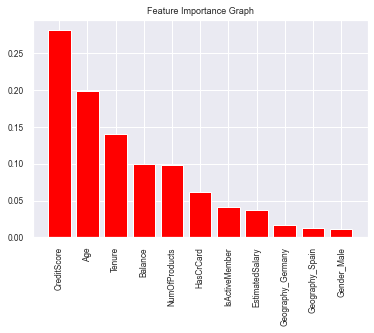

In [85]:
plt.title('Feature Importance Graph')
plt.bar(range(X_train.shape[1]), importances[indices], color = "red", align = "center")
plt.xticks(range(X_train.shape[1]), features_label, rotation = 90)
plt.show()

In [86]:
# Only considering the features with values > 0.03
features_label1 = features_label[:-3]

In [87]:
best_estimator

RandomForestClassifier(max_depth=70, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=200)

In [88]:
# Training RFC with the selected features
rfc_f = RandomForestClassifier(max_depth=50, max_features='sqrt', min_samples_leaf=4,
                       min_samples_split=10, n_estimators=1600)
X_new = X_train[features_label1]
rfc_f.fit(X_new, y_train)
rfc_f_predict = rfc_f.predict(X_test[features_label1])
rfc_f_acc = accuracy_score(y_test, rfc_f_predict)

print('Accuracy using RandomForest woth selected features is', round(rfc_f_acc*100,2))
cm = confusion_matrix(y_test,rfc_f_predict)
print('Confusion Matrix is')
print(cm)
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (fn+tp)
print('Sensitivity attained using GridSearchCV Logistic Regression is:',round(sensitivity,2))
fpr, tpr, thresholds = metrics.roc_curve(y_test, rfc_f_predict)
roc_auc = metrics.auc(fpr, tpr)
print('AUC using GridSearchCV Logistic Regression is:', round(roc_auc,2))
model_accuracy['models'].append('RF_selectedFeatures')
model_accuracy['accuracy'].append(round(rfc_f_acc*100,2))
model_accuracy['auc'].append(roc_auc)
model_accuracy['sensitivity'].append(sensitivity)

Accuracy using RandomForest woth selected features is 84.83
Confusion Matrix is
[[1450   46]
 [ 241  155]]
Sensitivity attained using GridSearchCV Logistic Regression is: 0.39
AUC using GridSearchCV Logistic Regression is: 0.68


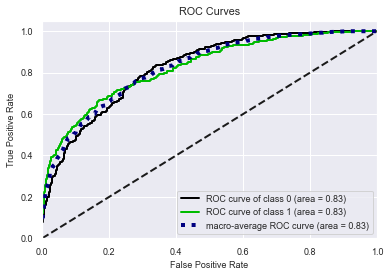

In [89]:
skplot.metrics.plot_roc(y_test, rfc_f.predict_proba(X_test[features_label1]), plot_micro=False)

### Naive Bayes Model

In [91]:
from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB()
bayes.fit(X_train,y_train)
bayes_y = bayes.predict(X_test)
nb_acc = accuracy_score(bayes_y,y_test)

print('Accuracy using Naive Bayes is', round(nb_acc*100,2))
cm = confusion_matrix(y_test,bayes_y)
print('Confusion Matrix is')
print(cm)
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (fn+tp)
print('Sensitivity using Naive Bayes is:',round(sensitivity,2))
fpr, tpr, thresholds = metrics.roc_curve(y_test, bayes_y)
roc_auc = metrics.auc(fpr, tpr)
print('AUC using Naive Bayes is:', round(roc_auc,2))
model_accuracy['models'].append('NaiveBayes')
model_accuracy['accuracy'].append(round(nb_acc*100,2))
model_accuracy['auc'].append(roc_auc)
model_accuracy['sensitivity'].append(sensitivity)

Accuracy using Naive Bayes is 83.3
Confusion Matrix is
[[1420   76]
 [ 240  156]]
Sensitivity using Naive Bayes is: 0.39
AUC using Naive Bayes is: 0.67


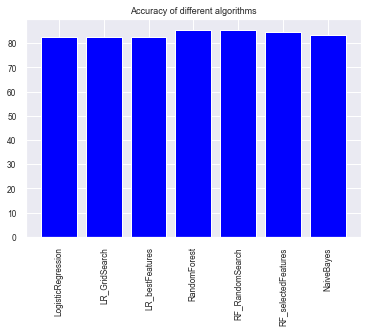

In [92]:
plt.title('Accuracy of different algorithms')
plt.bar(range(len(model_accuracy['models'])), model_accuracy['accuracy'], color = "blue", align = "center")
plt.xticks(range(len(model_accuracy['models'])), model_accuracy['models'], rotation = 90)
plt.show()

### K-Nearest Neighbours

In [93]:
from sklearn.neighbors import KNeighborsClassifier
for neighbour in [2,3,4,5]:
    neigh = KNeighborsClassifier(n_neighbors=3,metric='minkowski',p=2)

    neigh.fit(X_train,y_train) 

    ypredknn=pd.DataFrame(neigh.predict(X_test))
    print('neighbours ',neighbour, ': score is',accuracy_score(y_test,ypredknn))
print(confusion_matrix(y_test, ypredknn))
knn_acc = accuracy_score(y_test,ypredknn)

print('Accuracy using KNN is', round(knn_acc*100,2))
cm = confusion_matrix(y_test,ypredknn)
print('Confusion Matrix is')
print(cm)
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (fn+tp)
print('Sensitivity using KNN is:',round(sensitivity,2))
fpr, tpr, thresholds = metrics.roc_curve(y_test, ypredknn)
roc_auc = metrics.auc(fpr, tpr)
print('AUC using KNN is:', round(roc_auc,2))
model_accuracy['models'].append('KNN')
model_accuracy['accuracy'].append(round(knn_acc*100,2))
model_accuracy['auc'].append(roc_auc)
model_accuracy['sensitivity'].append(sensitivity)
print(classification_report(y_test, ypredknn))


neighbours  2 : score is 0.8150105708245243
neighbours  3 : score is 0.8150105708245243
neighbours  4 : score is 0.8150105708245243
neighbours  5 : score is 0.8150105708245243
[[1393  103]
 [ 247  149]]
Accuracy using KNN is 81.5
Confusion Matrix is
[[1393  103]
 [ 247  149]]
Sensitivity using KNN is: 0.38
AUC using KNN is: 0.65
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      1496
           1       0.59      0.38      0.46       396

    accuracy                           0.82      1892
   macro avg       0.72      0.65      0.67      1892
weighted avg       0.80      0.82      0.80      1892



### Over-Sampling the minority class

In [94]:
majority_df = df[df['Exited'] == 0]
minority_df = df[df['Exited'] == 1]

In [95]:
len(majority_df)

7584

In [96]:
len(minority_df)

1872

In [97]:
1872 + 7584 == len(df)

True

In [98]:
from sklearn.utils import resample
df_minority_upsampled = resample(minority_df, replace=True,     # sample with replacement
                                 n_samples=7584,    # to match majority class
                                 random_state=123) # reproducible results
df_upsampled = pd.concat([majority_df, df_minority_upsampled])

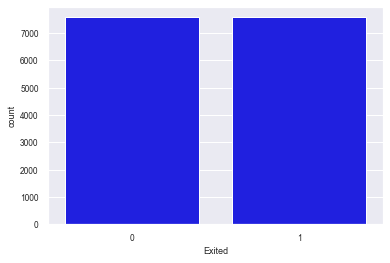

In [99]:
sns.countplot(df_upsampled['Exited'],color='blue')

In [100]:
X = df_upsampled.drop(['Exited'], axis =1)
y = df_upsampled['Exited']

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [102]:
best_estimator

RandomForestClassifier(max_depth=70, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=200)

In [103]:
rfc_sampled = RandomForestClassifier(max_depth=50, max_features='sqrt', min_samples_leaf=4,
                       min_samples_split=10, n_estimators=1600)
rfc_sampled.fit(X_train, y_train)
rfc_s_preds = rfc_sampled.predict(X_test)
rfc_s_acc = accuracy_score(y_test, rfc_s_preds)

print('Accuracy using RandomForest and sampling is', round(rfc_s_acc*100,2))
cm = confusion_matrix(y_test,rfc_s_preds)
print('Confusion Matrix is')
print(cm)
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (fn+tp)
print('Sensitivity with RandomForest when sampling is done is:',round(sensitivity,2))
fpr, tpr, thresholds = metrics.roc_curve(y_test, rfc_s_preds)
roc_auc = metrics.auc(fpr, tpr)
print('AUC for Random Forest when sampled is:', round(roc_auc,2))
model_accuracy['models'].append('RandomForest_Sampled')
model_accuracy['accuracy'].append(round(rfc_s_acc*100,2))
model_accuracy['auc'].append(roc_auc)
model_accuracy['sensitivity'].append(sensitivity)


Accuracy using RandomForest and sampling is 89.22
Confusion Matrix is
[[1298  196]
 [ 131 1409]]
Sensitivity with RandomForest when sampling is done is: 0.91
AUC for Random Forest when sampled is: 0.89


[[1298  196]
 [ 131 1409]]


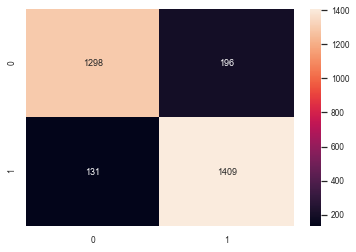

In [104]:
cm = confusion_matrix(y_test, rfc_s_preds)
print(cm)
sns.heatmap(cm, annot=True, fmt = 'd')

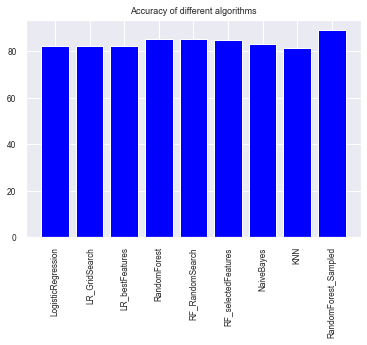

In [105]:
plt.title('Accuracy of different algorithms')
plt.bar(range(len(model_accuracy['models'])), model_accuracy['accuracy'], color = "blue", align = "center")
plt.xticks(range(len(model_accuracy['models'])), model_accuracy['models'], rotation = 90)
plt.show()

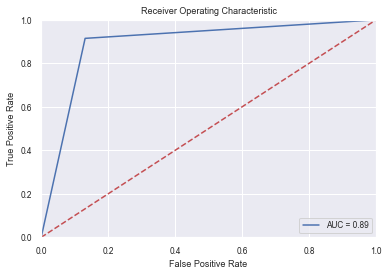

In [106]:
# ROC curve for Random Forest Sampled Data
from sklearn import metrics
import matplotlib.pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(y_test, rfc_s_preds)
roc_auc = metrics.auc(fpr, tpr)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion Matrix for the final Random Forest model with sampling is


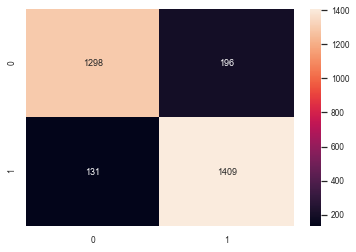

In [107]:
print("Confusion Matrix for the final Random Forest model with sampling is")
cm = confusion_matrix(y_test,rfc_s_preds)
sns.heatmap(cm, annot=True, fmt = 'd')

In [109]:
print('Classification report for the final model is')
print(classification_report(y_test, rfc_s_preds))

Classification report for the final model is
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1494
           1       0.88      0.91      0.90      1540

    accuracy                           0.89      3034
   macro avg       0.89      0.89      0.89      3034
weighted avg       0.89      0.89      0.89      3034



In [110]:
eval_df = pd.DataFrame(model_accuracy)

In [111]:
eval_df.head(8)
eval_df.to_csv('models_evaluation.csv', index = False)

In [112]:
eval_df

,models,accuracy,auc,sensitivity
0,LogisticRegression,82.56,0.633467,0.303030
1,LR_GridSearch,82.45,0.628157,0.290404
2,LR_bestFeatures,82.40,0.823996,0.285354
3,RandomForest,85.52,0.704174,0.444444
4,RF_RandomSearch,85.36,0.701315,0.439394
5,RF_selectedFeatures,84.83,0.680333,0.391414
6,NaiveBayes,83.30,0.671569,0.393939
7,KNN,81.50,0.653706,0.376263
8,RandomForest_Sampled,89.22,0.891872,0.914935
